In [3]:
import imageio
import keras
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, AveragePooling2D, BatchNormalization, Activation, Concatenate, Add
import pandas as pd
from keras.applications.vgg16 import VGG16
from keras.callbacks import Callback
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
def cnn_model(img,wb_img):

  #branch 1
  conv1 = Conv2D(16, (5, 5), padding='same', strides=1)(img)
  conv1_a = Activation('relu')(conv1)
  
  # Block1 in branch 1
  convb1_1 = Conv2D(16, (3, 3), padding='same', strides=1)(conv1_a)
  convb1_b1 = BatchNormalization()(convb1_1)
  convb1_a1 = Activation('relu')(convb1_b1)
  convb1_2 = Conv2D(16, (3, 3), padding='same', strides=1)(convb1_a1)
  concatb1_c1 = Concatenate()([convb1_1,convb1_2])
  convb1_b2 = BatchNormalization()(concatb1_c1)
  convb1_a2 = Activation('relu')(convb1_b2)
  convb1_3 = Conv2D(16, (3, 3), padding='same', strides=1)(convb1_a2)
  concatb1_c2 = Concatenate()([concatb1_c1,convb1_3])
  convb1_b3 = BatchNormalization()(concatb1_c2)
  convb1_a3 = Activation('relu')(convb1_b3)
  convb1_4 = Conv2D(16, (3, 3), padding='same', strides=1)(convb1_a3)
  concatb1_c3 = Concatenate()([concatb1_c2,convb1_4])
  convb1_b4 = BatchNormalization()(concatb1_c3)
  convb1_a4 = Activation('relu')(convb1_b4)
  convb1_5 = Conv2D(16, (3, 3), padding='same', strides=1)(convb1_a4)
 
  # Concatenation layer 
  concat_1 = Concatenate()([convb1_5,conv1])
  conv_b1 = BatchNormalization()(concat_1)
  conv_a1 = Activation('relu')(conv_b1)

  # Block2 in branch 1
  convb2_1 = Conv2D(16, (3, 3), padding='same', strides=1)(conv_a1)
  convb2_b1 = BatchNormalization()(convb2_1)
  convb2_a1 = Activation('relu')(convb2_b1)
  convb2_2 = Conv2D(16, (3, 3), padding='same', strides=1)(convb2_a1)
  concatb2_c1 = Concatenate()([convb2_1,convb2_2])
  convb2_b2 = BatchNormalization()(concatb2_c1)
  convb2_a2 = Activation('relu')(convb2_b2)
  convb2_3 = Conv2D(16, (3, 3), padding='same', strides=1)(convb2_a2)
  concatb2_c2 = Concatenate()([concatb2_c1,convb2_3])
  convb2_b3 = BatchNormalization()(concatb2_c2)
  convb2_a3 = Activation('relu')(convb2_b3)
  convb2_4 = Conv2D(16, (3, 3), padding='same', strides=1)(convb2_a3)
  concatb2_c3 = Concatenate()([concatb2_c2,convb2_4])
  convb2_b4 = BatchNormalization()(concatb2_c3)
  convb2_a4 = Activation('relu')(convb2_b4)
  convb2_5 = Conv2D(16, (3, 3), padding='same', strides=1)(convb2_a4)

  # Concatenation layer 
  concat_2 = Concatenate()([convb2_5,concat_1])
  conv_b2 = BatchNormalization()(concat_2)
  conv_a2 = Activation('relu')(conv_b2)

  # Block3 in branch 1
  convb3_1 = Conv2D(32, (3, 3), padding='same', strides=1)(conv_a2)
  convb3_b1 = BatchNormalization()(convb3_1)
  convb3_a1 = Activation('relu')(convb3_b1)
  convb3_2 = Conv2D(32, (3, 3), padding='same', strides=1)(convb3_a1)
  concatb3_c1 = Concatenate()([convb3_1,convb3_2])
  convb3_b2 = BatchNormalization()(concatb3_c1)
  convb3_a2 = Activation('relu')(convb3_b2)
  convb3_3 = Conv2D(32, (3, 3), padding='same', strides=1)(convb3_a2)
  concatb3_c2 = Concatenate()([concatb3_c1,convb3_3])
  convb3_b3 = BatchNormalization()(concatb3_c2)
  convb3_a3 = Activation('relu')(convb3_b3)
  convb3_4 = Conv2D(32, (3, 3), padding='same', strides=1)(convb3_a3)
  concatb3_c3 = Concatenate()([concatb3_c2,convb3_4])
  convb3_b4 = BatchNormalization()(concatb3_c3)
  convb3_a4 = Activation('relu')(convb3_b4)
  convb3_5 = Conv2D(32, (3, 3), padding='same', strides=1)(convb3_a4)

  
  #branch 2
  convw1 = Conv2D(16, (5, 5), padding='same', strides=1)(wb_img)
  convw1_a = Activation('relu')(convw1)

  # Block1 in branch 2
  convwb1_1 = Conv2D(16, (3, 3), padding='same', strides=1)(convw1_a)
  convwb1_b1 = BatchNormalization()(convwb1_1)
  convwb1_a1 = Activation('relu')(convwb1_b1)
  convwb1_2 = Conv2D(16, (3, 3), padding='same', strides=1)(convwb1_a1)
  concatwb1_c1 = Concatenate()([convwb1_1,convwb1_2])
  convwb1_b2 = BatchNormalization()(concatwb1_c1)
  convwb1_a2 = Activation('relu')(convwb1_b2)
  convwb1_3 = Conv2D(16, (3, 3), padding='same', strides=1)(convwb1_a2)
  concatwb1_c2 = Concatenate()([concatwb1_c1,convwb1_3])
  convwb1_b3 = BatchNormalization()(concatwb1_c2)
  convwb1_a3 = Activation('relu')(convwb1_b3)
  convwb1_4 = Conv2D(16, (3, 3), padding='same', strides=1)(convwb1_a3)
  concatwb1_c3 = Concatenate()([concatwb1_c2,convwb1_4])
  convwb1_b4 = BatchNormalization()(concatwb1_c3)
  convwb1_a4 = Activation('relu')(convwb1_b4)
  convwb1_5 = Conv2D(16, (3, 3), padding='same', strides=1)(convwb1_a4)
 
  # Concatenation layer 
  concatw_1 = Concatenate()([convwb1_5,convw1])
  convw_b1 = BatchNormalization()(concatw_1)
  convw_a1 = Activation('relu')(convw_b1)

  # Block2 in branch_2
  convwb2_1 = Conv2D(16, (3, 3), padding='same', strides=1)(convw_a1)
  convwb2_b1 = BatchNormalization()(convwb2_1)
  convwb2_a1 = Activation('relu')(convwb2_b1)
  convwb2_2 = Conv2D(16, (3, 3), padding='same', strides=1)(convwb2_a1)
  concatwb2_c1 = Concatenate()([convwb2_1,convwb2_2])
  convwb2_b2 = BatchNormalization()(concatwb2_c1)
  convwb2_a2 = Activation('relu')(convwb2_b2)
  convwb2_3 = Conv2D(16, (3, 3), padding='same', strides=1)(convwb2_a2)
  concatwb2_c2 = Concatenate()([concatwb2_c1,convwb2_3])
  convwb2_b3 = BatchNormalization()(concatwb2_c2)
  convwb2_a3 = Activation('relu')(convwb2_b3)
  convwb2_4 = Conv2D(16, (3, 3), padding='same', strides=1)(convwb2_a3)
  concatwb2_c3 = Concatenate()([concatwb2_c2,convwb2_4])
  convwb2_b4 = BatchNormalization()(concatwb2_c3)
  convwb2_a4 = Activation('relu')(convwb2_b4)
  convwb2_5 = Conv2D(16, (3, 3), padding='same', strides=1)(convwb2_a4)

  # Concatenation layer 
  concatw_2 = Concatenate()([convwb2_5,concatw_1])
  convw_b2 = BatchNormalization()(concatw_2)
  convw_a2 = Activation('relu')(convw_b2)

  # Block3 in branch 2
  convwb3_1 = Conv2D(32, (3, 3), padding='same', strides=1)(convw_a2)
  convwb3_b1 = BatchNormalization()(convwb3_1)
  convwb3_a1 = Activation('relu')(convwb3_b1)
  convwb3_2 = Conv2D(32, (3, 3), padding='same', strides=1)(convwb3_a1)
  concatwb3_c1 = Concatenate()([convwb3_1,convwb3_2])
  convwb3_b2 = BatchNormalization()(concatwb3_c1)
  convwb3_a2 = Activation('relu')(convwb3_b2)
  convwb3_3 = Conv2D(32, (3, 3), padding='same', strides=1)(convwb3_a2)
  concatwb3_c2 = Concatenate()([concatwb3_c1,convwb3_3])
  convwb3_b3 = BatchNormalization()(concatwb3_c2)
  convwb3_a3 = Activation('relu')(convwb3_b3)
  convwb3_4 = Conv2D(32, (3, 3), padding='same', strides=1)(convwb3_a3)
  concatwb3_c3 = Concatenate()([concatwb3_c2,convwb3_4])
  convwb3_b4 = BatchNormalization()(concatwb3_c3)
  convwb3_a4 = Activation('relu')(convwb3_b4)
  convwb3_5 = Conv2D(32, (3, 3), padding='same', strides=1)(convwb3_a4)

# addition of two branches
  mainb = Add()([convb3_5,convwb3_5])
  main_a1 = Activation('relu')(mainb)

  #block 1 after addition
  mconv_1 = Conv2D(32, (3, 3), padding='same', strides=1)(main_a1)
  mconv_b1 = BatchNormalization()(mconv_1)
  mconv_a1 = Activation('relu')(mconv_b1)
  mconv_2 = Conv2D(32, (3, 3), padding='same', strides=1)(mconv_a1)
  mconcat1 = Concatenate()([mconv_1,mconv_2])
  mconv_b2 = BatchNormalization()(mconcat1)
  mconv_a2 = Activation('relu')(mconv_b2)
  mconv_3 = Conv2D(32, (3, 3), padding='same', strides=1)(mconv_a2)
  mconcat2 = Concatenate()([mconcat1,mconv_3])
  mconv_b3 = BatchNormalization()(mconcat2)
  mconv_a3 = Activation('relu')(mconv_b3)
  mconv_4 = Conv2D(32, (3, 3), padding='same', strides=1)(mconv_a3)
  mconcat3 = Concatenate()([mconcat2,mconv_4])
  mconv_b4 = BatchNormalization()(mconcat3)
  mconv_a4 = Activation('relu')(mconv_b4)
  mconv_5 = Conv2D(32, (3, 3), padding='same', strides=1)(mconv_a4)

  # Concatenation layer 
  concatm_1 = Concatenate()([mainb,mconv_5])
  convm_b1 = BatchNormalization()(concatm_1)
  convm_a1 = Activation('relu')(convm_b1)

  mconv_n = Conv2D(3, (3, 3), padding='same', strides=1)(convm_a1)

  return mconv_n

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 112, 112, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 112, 112, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 16  1216        ['input_1[0][0]']                
                                )                                                             

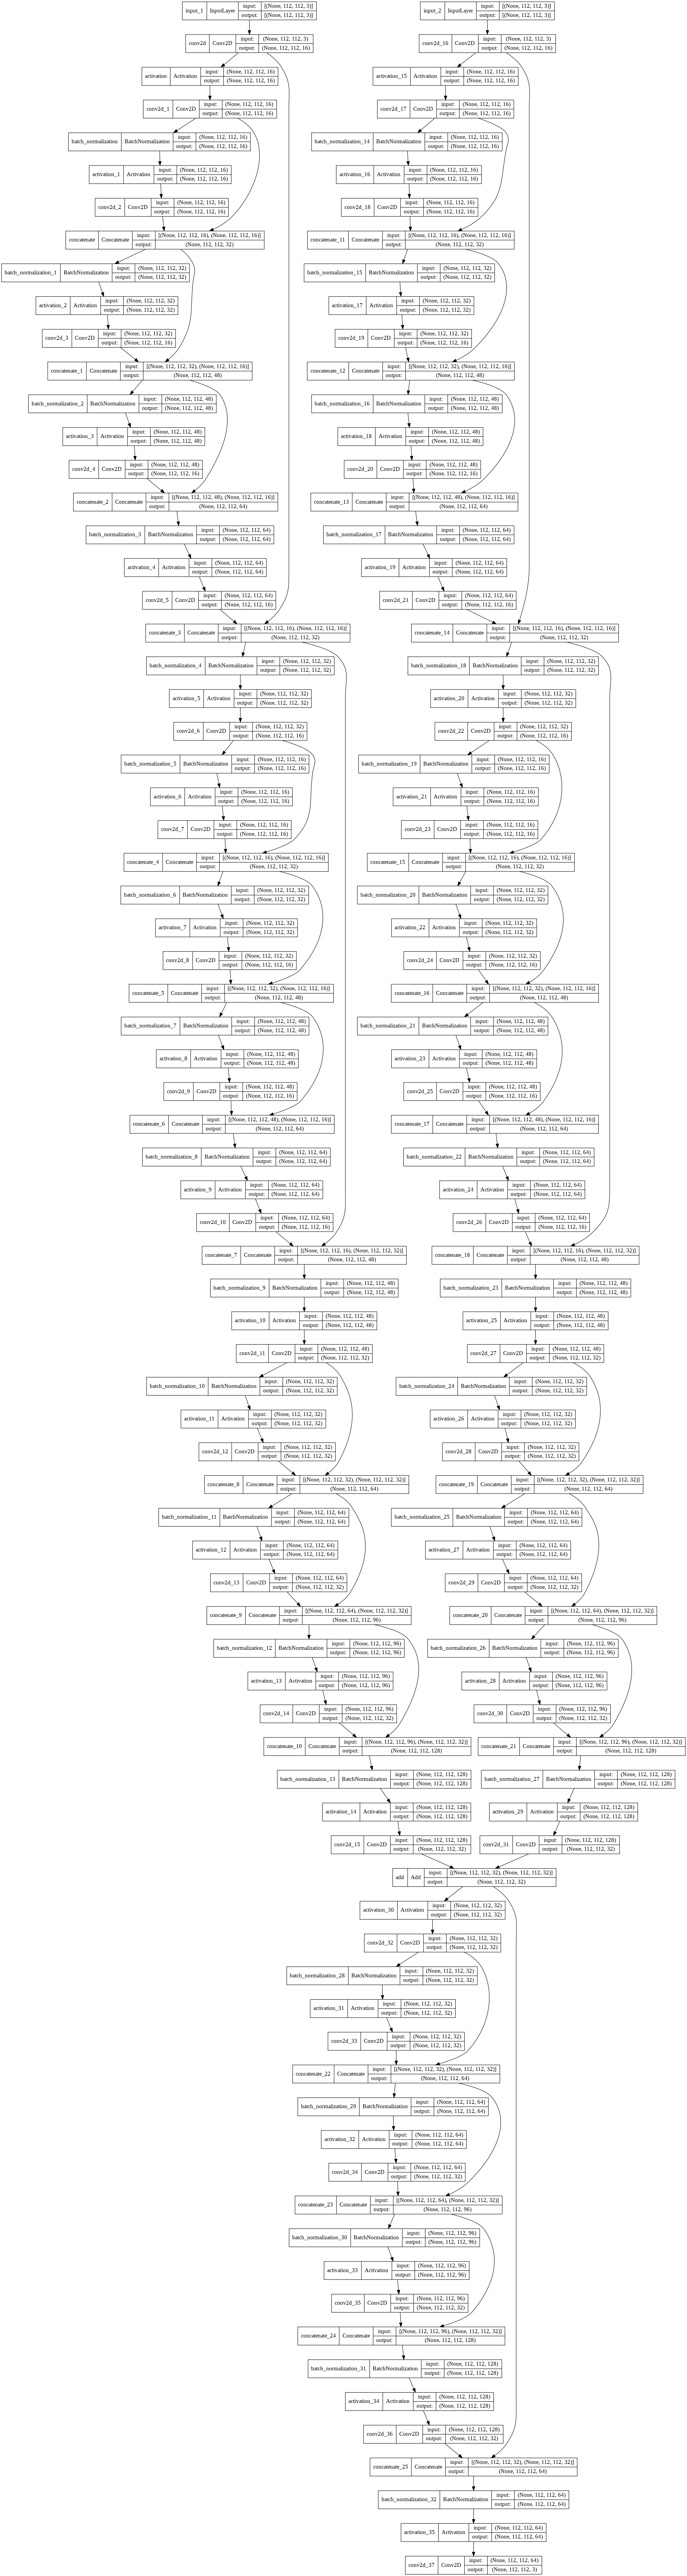

In [ ]:
input_sample = Input(shape=(112, 112, 3))
input_wb_sample = Input(shape=(112, 112, 3))
output_ = cnn_model(input_sample, input_wb_sample)
model_enhancer = Model(inputs=[input_sample, input_wb_sample], outputs=output_)
model_enhancer.summary()
plot_model(model_enhancer, to_file='cnn_model.png', show_shapes=True, show_dtype=False,show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,layer_range=None, show_layer_activations=False)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
d_path = '/content/drive/MyDrive/uw/uiebDataset/Dataset_Splitted/Dataset/train_real'
wb_path = '/content/drive/MyDrive/uw/uiebDataset/Dataset_Splitted/wb_dataset/wb_train_real'
t_path = '/content/drive/MyDrive/uw/uiebDataset/Dataset_Splitted/Reference/train_ref'


data = []
wb_data = []
target = []

im_h = 112
im_w = 112
for imagePath in os.listdir(d_path):

    # get full the path of the real, normalized and reference(target) images
    data_path = os.path.join(d_path, imagePath)
    wb_data_path = os.path.join(wb_path, imagePath)
    target_path = os.path.join(t_path, imagePath)
    
    #read the images
    img = cv2.imread(data_path)
    wb_img = cv2.imread(wb_data_path)
    target_img = cv2.imread(target_path)

    #resize the images into 112 x 112
    img = cv2.resize(img, (im_h, im_w))
    wb_img = cv2.resize(wb_img, (im_h, im_w))
    target_img = cv2.resize(target_img, (im_h, im_w))
        
    # change the images into array list
    data.append(img)
    wb_data.append(wb_img)
    target.append(target_img)

In [ ]:
# convert arrays into numpy arrays
data = np.array(data)
wb_data = np.array(wb_data)
target = np.array(target)
#print the shapes of images
print(data.shape, wb_data.shape, target.shape)

(800, 112, 112, 3) (800, 112, 112, 3) (800, 112, 112, 3)


In [ ]:
# save the numpy arrays
np.save('data', data)
np.save('wb_data', wb_data)
np.save('target', target)

In [ ]:
# load the numpy arrays
data = np.load('data.npy')
wb_data = np.load('wb_data.npy')
target = np.load('target.npy')

#print the shapes of images
print(data.shape, wb_data.shape, target.shape)

(800, 112, 112, 3) (800, 112, 112, 3) (800, 112, 112, 3)


In [ ]:
# initiate keras tensor input_sample, input_wb_sample, and output_
input_sample = Input(shape=(im_h, im_w, 3))
input_wb_sample = Input(shape=(im_h, im_w, 3))
output_ = cnn_model(input_sample, input_wb_sample)

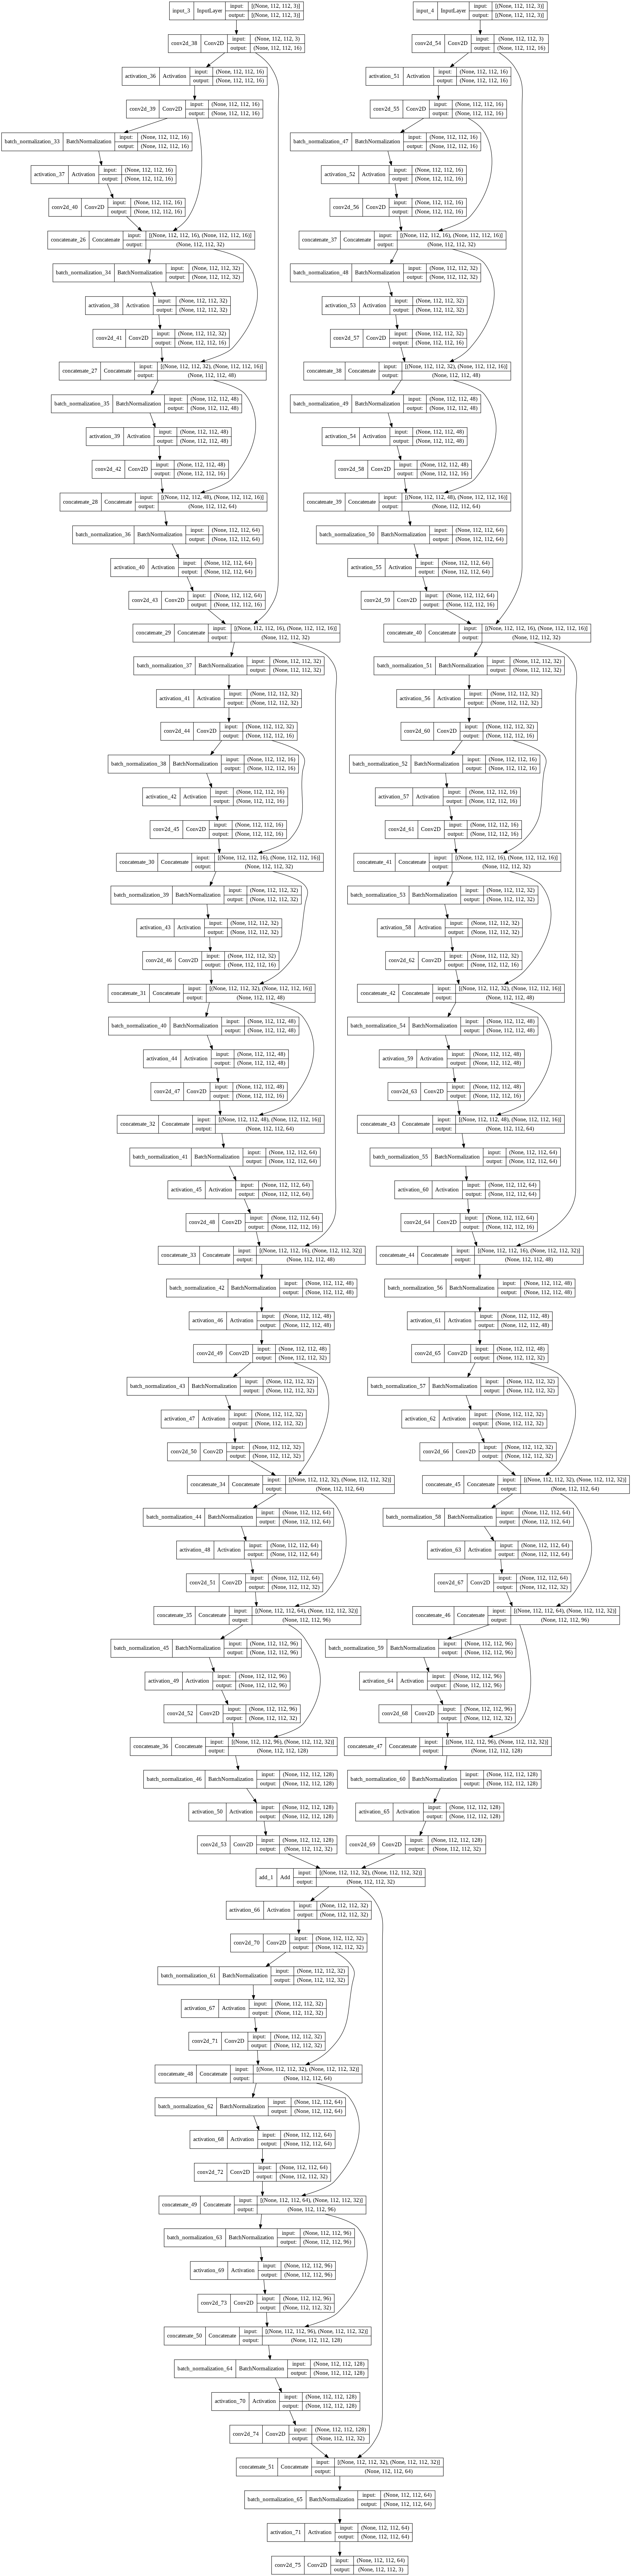

In [ ]:
# create the model in function way by specfying input and output
model_enhancer = Model(inputs=[input_sample, input_wb_sample], outputs=output_)
plot_model(model_enhancer, to_file='cnn_model.png', show_shapes=True, show_dtype=False,show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,layer_range=None, show_layer_activations=False)

In [ ]:
# Configures the model for training with loss function and optimizer
model_enhancer.compile(loss='mse', optimizer='adam', metrics=['mse', 'accuracy'])
model_enhancer.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 112, 112, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_4 (InputLayer)           [(None, 112, 112, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_38 (Conv2D)             (None, 112, 112, 16  1216        ['input_3[0][0]']                
                                )                                                           

In [ ]:
# split training dataset into 80% for training and 20% for validation

train_data, val_data,train_wb_data, val_wb_data, train_target, val_target = train_test_split(data,wb_data, target,test_size=0.2)

print(len(train_data),  len(train_wb_data), len(train_target), len(val_data), len(val_wb_data), len(val_target))

640 640 640 160 160 160


In [ ]:
checkpoint_path = "/content/drive/MyDrive/Dataset_splitted/checkpoints/Final/weights_best.hdf5"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss',mode='min', save_best_only=True, verbose=1)

In [ ]:
epoch = 25

In [ ]:
# train the model
history = model_enhancer.fit([train_data, train_wb_data], train_target, validation_data=([val_data, val_wb_data], val_target), batch_size=16, epochs=epoch, callbacks=[cp_callback], shuffle=True)

Epoch 1/25
40/40 [==============================] - ETA: 0s - loss: 15092.8799 - mse: 15092.8838 - accuracy: 0.5082 
Epoch 00001: val_loss improved from inf to 92062.21094, saving model to /content/drive/MyDrive/Dataset_splitted/checkpoints/Final/weights_best.hdf5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


40/40 [==============================] - 943s 23s/step - loss: 15092.8799 - mse: 15092.8838 - accuracy: 0.5082 - val_loss: 92062.2109 - val_mse: 92062.2109 - val_accuracy: 0.2455
Epoch 2/25
40/40 [==============================] - ETA: 0s - loss: 11603.5518 - mse: 11603.5527 - accuracy: 0.3526 
Epoch 00002: val_loss improved from 92062.21094 to 12477.97266, saving model to /content/drive/MyDrive/Dataset_splitted/checkpoints/Final/weights_best.hdf5
40/40 [==============================] - 937s 23s/step - loss: 11603.5518 - mse: 11603.5527 - accuracy: 0.3526 - val_loss: 12477.9727 - val_mse: 12477.9717 - val_accuracy: 0.2536
Epoch 3/25
40/40 [==============================] - ETA: 0s - loss: 8411.4805 - mse: 8411.4805 - accuracy: 0.3086 
Epoch 00003: val_loss improved from 12477.97266 to 6348.83105, saving model to /content/drive/MyDrive/Dataset_splitted/checkpoints/Final/weights_best.hdf5
40/40 [==============================] - 933s 23s/step - loss: 8411.4805 - mse: 8411.4805 - accurac

In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'mse', 'accuracy', 'val_loss', 'val_mse', 'val_accuracy'])


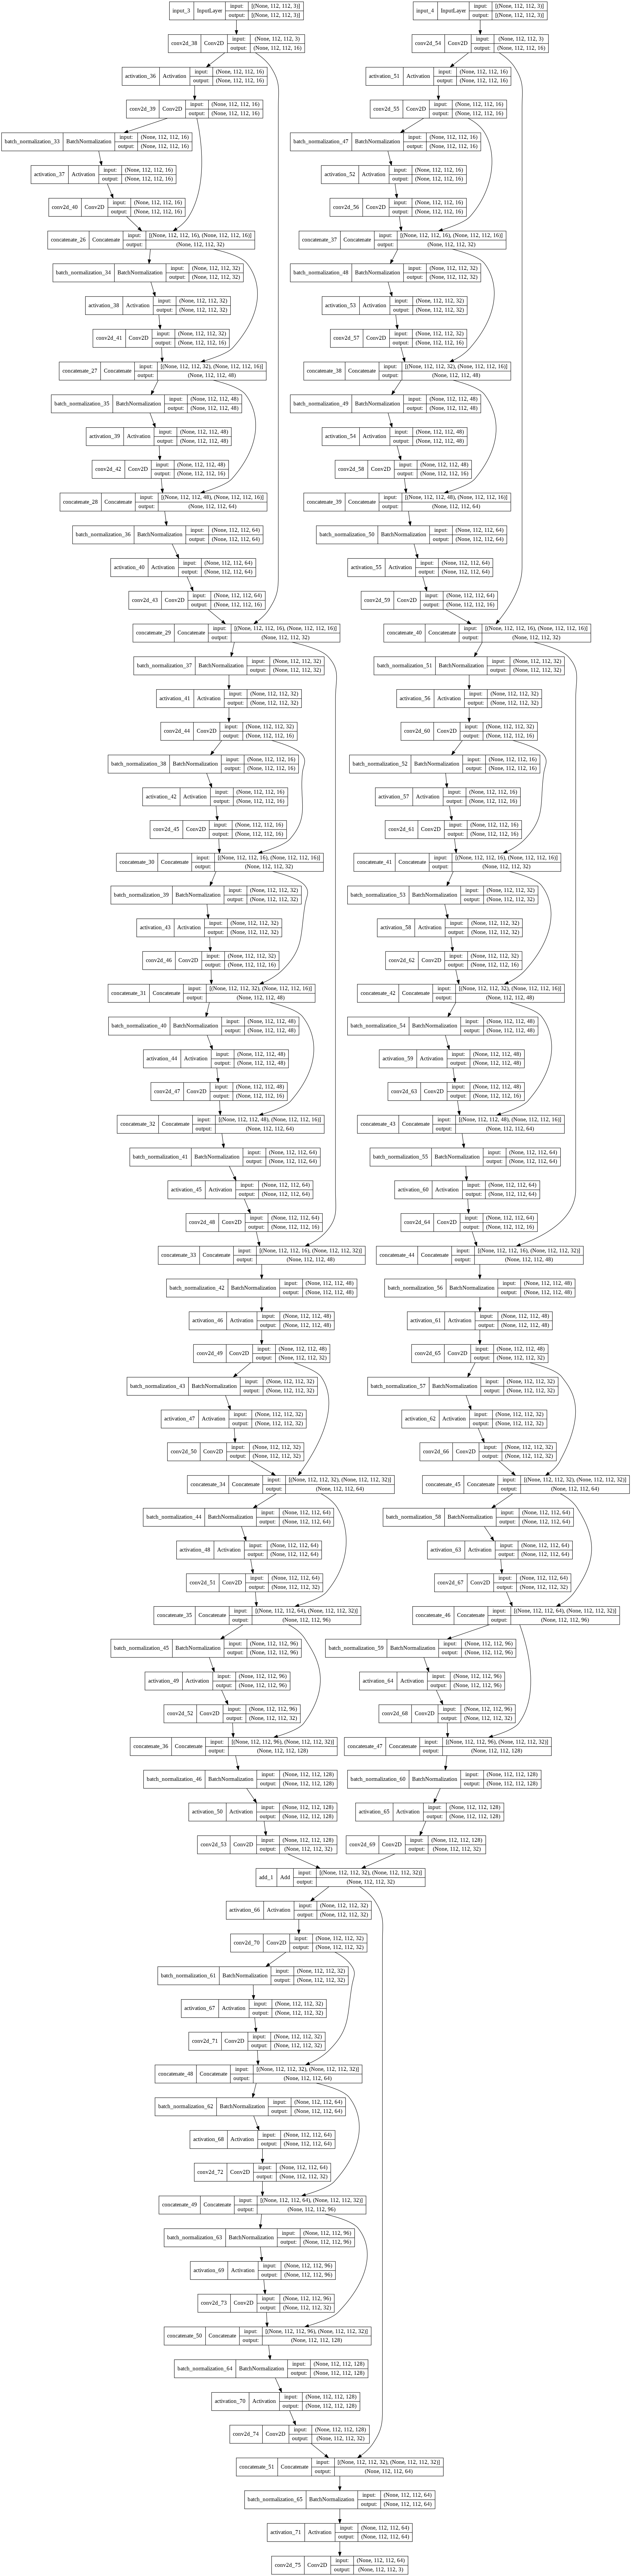

In [ ]:
plot_model(model_enhancer, to_file='cnn_model.png', show_shapes=True, show_dtype=False,show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,layer_range=None, show_layer_activations=False)

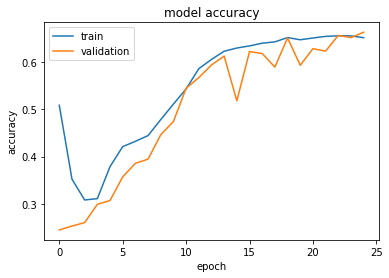

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

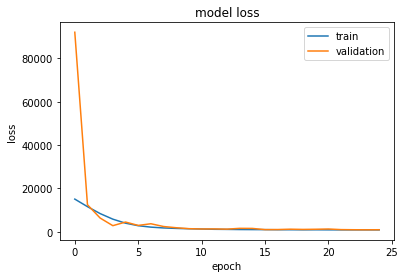

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# Evaluate the model on the test data
val_loss, val_mse, val_accuracy = model_enhancer.evaluate([val_data, val_wb_data], val_target, verbose=2)

print("validation loss", val_loss)
print("MSE for validation:", val_mse)
print("validation accuracy:", val_accuracy)

5/5 - 43s - loss: 963.3619 - mse: 963.3619 - accuracy: 0.6623 - 43s/epoch - 9s/step
validation loss 963.3619384765625
MSE for validation: 963.3618774414062
validation accuracy: 0.6623435616493225


In [ ]:
# initiate keras tensor input_sample, input_wb_sample, and output_
input_sample = Input(shape=(im_h, im_w, 3))
input_wb_sample = Input(shape=(im_h, im_w, 3))
output_ = cnn_model(input_sample, input_wb_sample)

In [ ]:
# create the model in function way by specfying input and output
model_enhancer_test = Model(inputs=[input_sample, input_wb_sample], outputs=output_)

In [ ]:
# load weights
model_enhancer_test.load_weights("/content/drive/MyDrive/Dataset_splitted/checkpoints/Final/weights_best.hdf5")

In [ ]:
# Configures the model for training with loss function and optimizer
model_enhancer_test.compile(loss='mse', optimizer='adam', metrics=['mse', 'accuracy'])

In [ ]:
#Path of testing images
test_path = '/content/drive/MyDrive/uw/uiebDataset/Dataset_Splitted/Dataset/test_real/'
wb_test_path = '/content/drive/MyDrive/uw/uiebDataset/Dataset_Splitted/wb_dataset/wb_test_real/'
destination = '/content/drive/MyDrive/uw/uiebDataset/Dataset_Splitted/Outputs/Final_Output/'


for test_img_name in os.listdir(test_path):

    #read the raw images
    test_img = cv2.imread(os.path.join(test_path, test_img_name))
    wb_test_img = cv2.imread(os.path.join(wb_test_path, test_img_name))
   
    #resize the images into 112 x 112
    test_img = cv2.resize(test_img, (im_h, im_w))
    wb_test_img = cv2.resize(wb_test_img, (im_h, im_w))
    
    # reshape the image (112, 112, 3) into (1, 112, 112, 3)
    test_img = test_img.reshape(1,im_h, im_w,3)
    wb_test_img = wb_test_img.reshape(1,im_h, im_w,3)

    # use model to do prediction
    result = model_enhancer_test.predict([test_img, wb_test_img])
    
    result = result.squeeze()
    
    test_img = test_img.squeeze()
    
    test_img[:,:,:] = result[:,:,:]
    #Save the enhanced images
    cv2.imwrite(os.path.join(destination, test_img_name), test_img)

In [11]:
target_path = '/content/drive/MyDrive/uw/uiebDataset/Dataset_Splitted/Reference/test_ref11'
predicted_path = '/content/drive/MyDrive/uw/uiebDataset/Dataset_Splitted/Outputs/Final_Output/'

target_data = []
predict_data = []

im_h = 112
im_w = 112
for image_name in os.listdir(target_path):

    #read the raw images
    target_img = cv2.imread(os.path.join(target_path, image_name))
    predicted_img = cv2.imread(os.path.join(predicted_path, image_name))
    

    #resize the images into 112 x 112
    target_img = cv2.resize(target_img, (im_h, im_w))
    predicted_img = cv2.resize(predicted_img, (im_h, im_w))
        
    # put the images into array list
    target_data.append(target_img)
    predict_data.append(predicted_img)

In [12]:
# convert arrays into numpy arrays
target_data = np.array(target_data)
predict_data = np.array(predict_data)

print(target_data.shape, predict_data.shape)

(90, 112, 112, 3) (90, 112, 112, 3)


In [13]:
# save the numpy arrays
np.save('target_data', target_data)
np.save('predict_data', predict_data)

In [14]:
# load the numpy arrays
target_data = np.load('target_data.npy')
predict_data = np.load('predict_data.npy')

print(target_data.shape, predict_data.shape)

(90, 112, 112, 3) (90, 112, 112, 3)


In [15]:
###### FULL-REFERENCE IMAGE QUALITY ASSESSMENT IN TERMS OF MSE, PSNR, AND SSIM #######
#Mean squared error

def mean_squared_error(predict_data, target_data):
    MSE =  np.mean((predict_data - target_data) ** 2, dtype=np.float64)
    return MSE

Value_Mse = mean_squared_error(target_data, predict_data)
print("MSE for test data :",Value_Mse)  

MSE for test data : 88.37366543839758


In [16]:
#Peak signal to noise ratio
from math import log10, sqrt

def PSNR(target_data, predict_data):
 mse =  np.mean((predict_data - target_data) ** 2, dtype=np.float64)
 if(mse == 0):
  return 100
 max_pixel = 255.0
 psnr = 10 * log10(np.square(max_pixel) / mse)
 return psnr 

value = PSNR(target_data, predict_data)
print("\nPeak Signal-to-Noise Ratio (PSNR) value is", value, "dB")


Peak Signal-to-Noise Ratio (PSNR) value is 28.667574924461622 dB


In [17]:
#Structural similarity index

from skimage.metrics import structural_similarity as ssim
ssim_value = ssim(target_data, predict_data, multichannel=True)
print("SSIM:", ssim_value)

SSIM: 0.8852396505461831
